<a href="https://colab.research.google.com/github/rkeaveney/yt-short-shazam/blob/main/yt_short_shazam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pytube
!pip install shazamio
!pip install nest-asyncio
!pip install pydub
import pytube as pt
import os
from pydub import AudioSegment
import nest_asyncio
nest_asyncio.apply()

In [21]:
#yt = pt.YouTube("https://www.youtube.com/watch?v=V1Z586zoeeE&ab_channel=HarryStylesVEVO")
#yt = pt.YouTube("https://www.youtube.com/watch?v=oDgyPD-HCsw&ab_channel=TheDubliners-Topic")
yt = pt.YouTube("https://www.youtube.com/watch?v=90WD_ats6eE&ab_channel=BobDylanVEVO")
t = yt.streams.filter(only_audio=True)
t[0].download(filename="file.mp3")

'/content/file.mp3'

In [22]:
song = AudioSegment.from_file("file.mp3")
song = song[10*1000:15*1000]
song = song.set_channels(1)
song.export("file.wav", format="wav")

<_io.BufferedRandom name='file.wav'>

In [23]:
import base64
encode_string = base64.b64encode(open("file.wav", "rb").read())

In [24]:
import requests

api = "https://shazam.p.rapidapi.com/songs/v2/detect"

querystring = {"timezone":"America/Chicago","locale":"en-US"}

payload = "\"Generate one on your own for testing and send the body with the content-type as text/plain\""

headers = {
	"content-type": "text/plain",
	"X-RapidAPI-Key": "[Secret Key]",
	"X-RapidAPI-Host": "shazam.p.rapidapi.com"
}

response = requests.post(api, data=encode_string, headers=headers, params=querystring)

print(response.json()['matches'][0]['id'])

id = response.json()['matches'][0]['id']

214669314


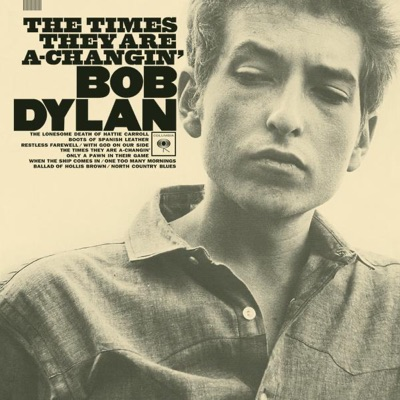


Title: The Times They Are A-Changin'
Artist: Bob Dylan


In [25]:
import asyncio
from shazamio import Shazam, Serialize

about_track = {}

async def main():
    shazam = Shazam()
    track_id = id
    about_track = await shazam.track_about(track_id=track_id)
    serialized = Serialize.track(data=about_track)

    response = requests.get(about_track['images']['coverart'])
    with open("coverart.jpg", "wb") as f:
        f.write(response.content)
    from IPython.display import Image, display
    display(Image(filename='coverart.jpg'))
    print('\nTitle: ' + about_track['title'])
    print('Artist: ' + about_track['subtitle'])

    #print(about_track)  # dict
    #print(serialized)  # serialized from dataclass factory

loop = asyncio.get_event_loop()
loop.run_until_complete(main())